Arushi Nigam

### Import Statements

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tools.eval_measures import mse
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import statistics
from scipy.stats import bootstrap
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn import preprocessing
from cmath import nan
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import hamming_loss, silhouette_score
from sklearn.cluster import KMeans
import statistics
from statistics import mode
from scipy.spatial.distance import hamming
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import SpectralClustering
from scipy.special import softmax

/Users/arushinigam/opt/anaconda3/envs/dsci552/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 1(b).

In [2]:
warnings.filterwarnings('ignore')

names = []
names.append('ID Number')
names.append('Diagnosis')
for i in range(1,4):
    radius = 'radius ' + str(i)
    names.append(radius)
    texture = 'texture ' + str(i)
    names.append(texture)
    peri = 'perimeter ' + str(i)
    names.append(peri)
    a = 'area ' + str(i)
    names.append(a)
    s = 'smoothness ' + str(i)
    names.append(s)
    c = 'compactness ' + str(i)
    names.append(c)
    con = 'concavity ' + str(i)
    names.append(con)
    cp = 'concave points ' + str(i)
    names.append(cp)
    sym = 'symmetry ' + str(i)
    names.append(sym)
    fd = 'fractal dimension ' + str(i)
    names.append(fd)
 
df = pd.read_csv('../data/wdbc.csv', names=names)

### 1b(i).

Iteration  1
Accuracy Score Train: 0.9824561403508771
Precision Score Train:  0.9879518072289156
True Positive Rate Train:  0.9647058823529412
F-1 Score Train:  0.9761904761904762
AUC Score Train: 0.9788564376799672
Accuracy Score Test: 0.9292035398230089
Precision Score Test:  0.84
True Positive Rate Test:  1.0
F-1 Score Test:  0.9130434782608696
AUC Score Test: 0.943661971830986
Iteration  2
Accuracy Score Train: 0.9846491228070176
Precision Score Train:  0.9939393939393939
True Positive Rate Train:  0.9647058823529412
F-1 Score Train:  0.9791044776119404
AUC Score Train: 0.9806046894282189
Accuracy Score Test: 0.8938053097345132
Precision Score Test:  0.7884615384615384
True Positive Rate Test:  0.9761904761904762
F-1 Score Test:  0.8723404255319148
AUC Score Test: 0.9106304493628438
Iteration  3
Accuracy Score Train: 0.9846491228070176
Precision Score Train:  0.9822485207100592
True Positive Rate Train:  0.9764705882352941
F-1 Score Train:  0.9793510324483775
AUC Score Train: 0.982

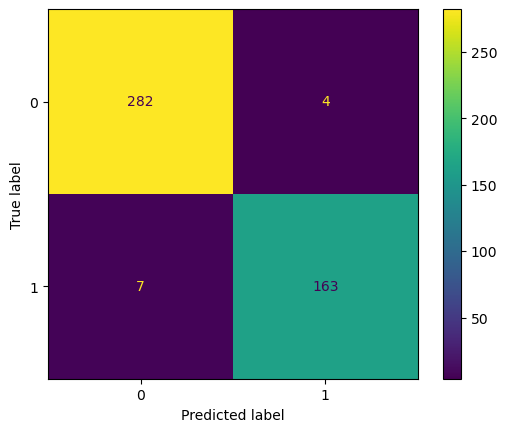

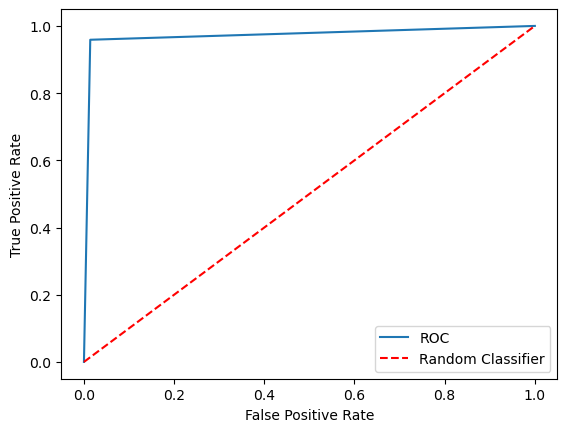


Testing Set


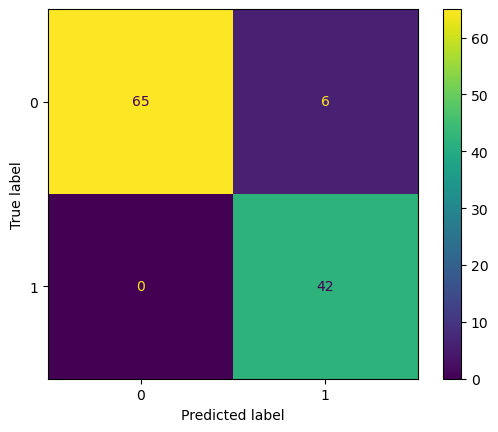

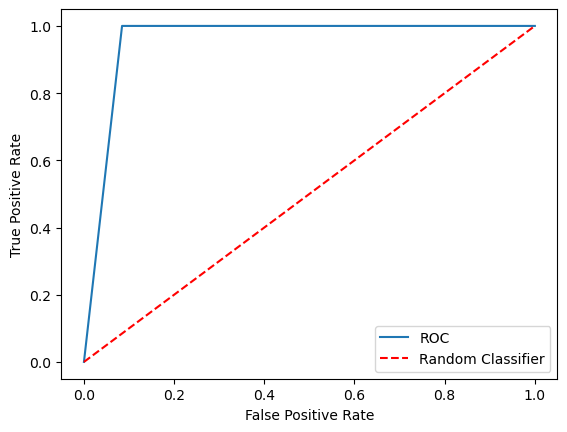



For all 30 iterations: 

Average Train Accuracy:  0.9839181286549704
Average Train Precision:  0.9892238231392311
Average Train Recall:  0.9674509803921566
Average Train F1-Score:  0.9781840031567892
Average Train AUC Score:  0.9805786370492252

Average Test Accuracy:  0.9274336283185841
Average Test Precision:  0.878913455419114
Average Test Recall:  0.9603174603174601
Average Test F1-Score:  0.9122378040732623
Average Test AUC Score:  0.9341493404873688


In [3]:
biavgprecisiontrain = [];
biavgrecalltrain = [];
biavgf1train = [];
biavgauctrain = [];
biavgaccuracytrain = [];
biavgprecisiontest = [];
biavgrecalltest = [];
biavgf1test = [];
biavgauctest = [];
biavgaccuracytest = [];

trainXs = pd.DataFrame()
trainYs = pd.DataFrame()

for i in range(1,31):

    df['Diagnosis'] = df['Diagnosis'].replace(['B'], 0)
    df['Diagnosis'] = df['Diagnosis'].replace(['M'], 1)

    dfM = df.loc[df['Diagnosis'] == 1]
    dfB = df.loc[df['Diagnosis'] == 0]

    dfM20 = dfM.sample(frac=0.2)
    dfM80 = dfM.drop(dfM20.index) 
    dfB20 = dfB.sample(frac=0.2)
    dfB80 = dfB.drop(dfB20.index)

    dfMtestYs = dfM20[['Diagnosis']]
    dfMtestXs = dfM20.drop(dfM20[['Diagnosis']], axis=1)
    dfMtrainYs = dfM80[['Diagnosis']]
    dfMtrainXs = dfM80.drop(dfM80[['Diagnosis']], axis=1)

    dfBtestYs = dfB20[['Diagnosis']]
    dfBtestXs = dfB20.drop(dfB20[['Diagnosis']], axis=1)
    dfBtrainYs = dfB80[['Diagnosis']]
    dfBtrainXs = dfB80.drop(dfB80[['Diagnosis']], axis=1)

    #append two dataframes and get the test and train sets
    trainXs = dfMtrainXs.append(dfBtrainXs)
    trainYs = dfMtrainYs.append(dfBtrainYs)

    testXs = dfMtestXs.append(dfBtestXs)
    testYs = dfMtestYs.append(dfBtestYs)

    trainXsnorm = MinMaxScaler().fit_transform(trainXs)
    testXsnorm = MinMaxScaler().fit_transform(testXs)

    print("Iteration ", str(i))
    parameters = {'C':[0.001,0.01,0.1,1]}
    model = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), parameters, cv=5)
    
    # ----------------- Training Set ----------------
    trainmodel = model.fit(trainXsnorm, trainYs)
    predYstrain = trainmodel.predict(trainXsnorm)
    # Accuracy
    actrain = accuracy_score(trainYs, predYstrain)
    print("Accuracy Score Train:", actrain)
    # Precision
    pscoretrain = metrics.precision_score(trainYs, predYstrain)
    print("Precision Score Train: ", pscoretrain)
    # Recall
    truepositivetrain = metrics.recall_score(trainYs, predYstrain)
    print("True Positive Rate Train: ", truepositivetrain)
    # F-1 Score
    f1Scoretrain = metrics.f1_score(trainYs, predYstrain)
    print("F-1 Score Train: ", f1Scoretrain) 
    #AUC Score
    auctrain = roc_auc_score(trainYs, predYstrain)
    print("AUC Score Train:", auctrain)

    # ----------------- Testing Set ----------------
    testmodel = model.fit(trainXsnorm, trainYs)
    predYstest = testmodel.predict(testXsnorm)
    # Accuracy
    actest =accuracy_score(testYs, predYstest)
    print("Accuracy Score Test:", actest)
    # Precision
    pscoretest = metrics.precision_score(testYs, predYstest)
    print("Precision Score Test: ", pscoretest)
    # Recall
    truepositivetest = metrics.recall_score(testYs, predYstest)
    print("True Positive Rate Test: ", truepositivetest)
    # F-1 Score
    f1Scoretest = metrics.f1_score(testYs, predYstest)
    print("F-1 Score Test: ", f1Scoretest) 
    #AUC Score
    auctest = roc_auc_score(testYs, predYstest)
    print("AUC Score Test:", auctest)

    # --------------- Print for one of the iterations -------------------
    if i == 30:
        # ------------------ Training Set ----------------------
        print("")
        print("Training Set")
        # Confusion Matrix
        cmatrix = metrics.confusion_matrix(trainYs, predYstrain)
        cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
        cmatrixdisp.plot()
        plt.grid(False)
        plt.show()

        #ROC Curve
        fp, tp, _ = roc_curve(trainYs, predYstrain)
        roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
        plt.legend()
        plt.show(roc_display)

        # ------------------ Testing Set ----------------------
        print("")
        print("Testing Set")
        # Confusion Matrix
        cmatrix = metrics.confusion_matrix(testYs, predYstest)
        cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
        cmatrixdisp.plot()
        plt.grid(False)
        plt.show()

        #ROC Curve
        fp, tp, _ = roc_curve(testYs, predYstest)
        roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
        plt.legend()
        plt.show(roc_display)
    
    biavgaccuracytrain.append(actrain)
    biavgprecisiontrain.append(pscoretrain);
    biavgrecalltrain.append(truepositivetrain);
    biavgf1train.append(f1Scoretrain);
    biavgauctrain.append(auctrain);

    biavgaccuracytest.append(actest)
    biavgprecisiontest.append(pscoretest);
    biavgrecalltest.append(truepositivetest);
    biavgf1test.append(f1Scoretest);
    biavgauctest.append(auctest);

print("")
print("")
print("For all 30 iterations: ")
print("")
print("Average Train Accuracy: ", sum(biavgaccuracytrain)/len(biavgaccuracytrain))
print("Average Train Precision: ", sum(biavgprecisiontrain)/len(biavgprecisiontrain))
print("Average Train Recall: ", sum(biavgrecalltrain)/len(biavgrecalltrain))
print("Average Train F1-Score: ", sum(biavgf1train)/len(biavgf1train))
print("Average Train AUC Score: ", sum(biavgauctrain)/len(biavgauctrain))
print("")
print("Average Test Accuracy: ", sum(biavgaccuracytest)/len(biavgaccuracytest))
print("Average Test Precision: ", sum(biavgprecisiontest)/len(biavgprecisiontest))
print("Average Test Recall: ", sum(biavgrecalltest)/len(biavgrecalltest))
print("Average Test F1-Score: ", sum(biavgf1test)/len(biavgf1test))
print("Average Test AUC Score: ", sum(biavgauctest)/len(biavgauctest))

### 1b(ii).

### 1(bii)A and B.

Iteration  1

Accuracy Score Train:  0.9780701754385965
Precision Score Train:  1.0
True Positive Rate Train:  0.9411764705882353
F-1 Score Train:  0.9696969696969697
AUC Score Train: 0.9705882352941176

Accuracy Score Test:  0.37168141592920356
Precision Score Test:  0.37168141592920356
True Positive Rate Test:  1.0
F-1 Score Test:  0.5419354838709677
AUC Score Test: 0.5

Iteration  2

Accuracy Score Train:  0.9780701754385965
Precision Score Train:  0.9878048780487805
True Positive Rate Train:  0.9529411764705882
F-1 Score Train:  0.9700598802395209
AUC Score Train: 0.9729740847387907

Accuracy Score Test:  0.37168141592920356
Precision Score Test:  0.37168141592920356
True Positive Rate Test:  1.0
F-1 Score Test:  0.5419354838709677
AUC Score Test: 0.5

Iteration  3

Accuracy Score Train:  0.9824561403508771
Precision Score Train:  0.9879518072289156
True Positive Rate Train:  0.9647058823529412
F-1 Score Train:  0.9761904761904762
AUC Score Train: 0.9788564376799672

Accuracy Score

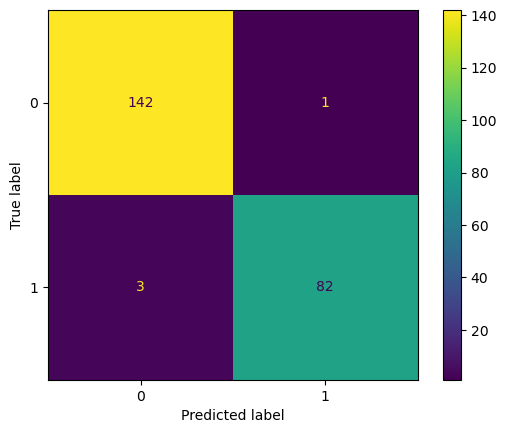

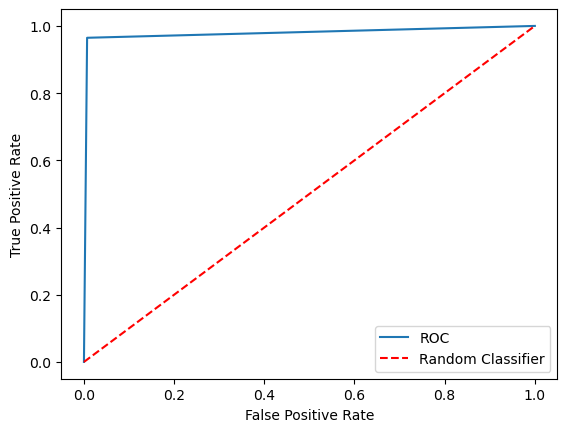


Testing Set


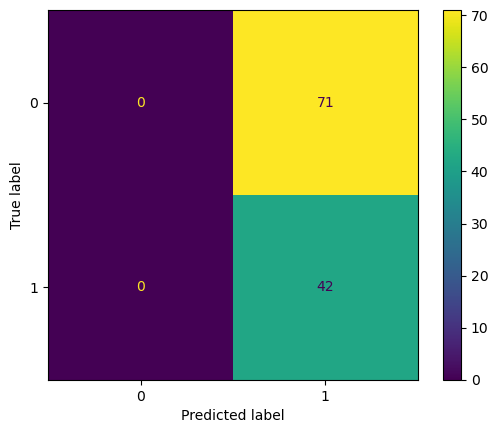

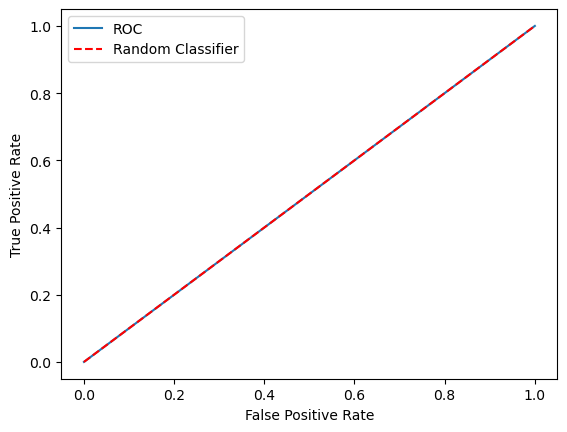



For all 30 iterations: 

Average Train Accuracy:  0.9814327485380114
Average Train Precision:  0.9926963964035066
Average Train Recall:  0.9572549019607843
Average Train F1-Score:  0.9746087040787955
Average Train AUC Score:  0.9765295488824898

Average Test Accuracy:  0.3716814159292034
Average Test Precision:  0.3716814159292034
Average Test Recall:  1.0
Average Test F1-Score:  0.5419354838709673
Average Test AUC Score:  0.5


In [8]:
biiavgaccuracytrain = [];
biiavgprecisiontrain = [];
biiavgrecalltrain = [];
biiavgf1train = [];
biiavgauctrain = [];
biiavgaccuracytest = [];
biiavgprecisiontest = [];
biiavgrecalltest = [];
biiavgf1test = [];
biiavgauctest = [];

# -------------------- Monte-Carlo ----------------------
for i in range(1,31):

    # ----------------------- Data Preprocessing ----------------------
    trainfull = trainXs
    trainfull['Diagnosis'] = trainYs
    trainM = trainfull.loc[trainfull['Diagnosis'] == 1]
    trainB = trainfull.loc[trainfull['Diagnosis'] == 0]

    trainM50l = trainM.sample(frac=0.5)
    trainM50ul = trainM.drop(trainM50l.index)
    trainB50l = trainB.sample(frac=0.5)
    trainB50ul = trainB.drop(trainB50l.index)

    trainM50Ysl = trainM50l[['Diagnosis']]
    trainM50Xsl = trainM50l.drop(trainM50l[['Diagnosis']], axis=1)
    trainM50Ysul = trainM50ul[['Diagnosis']]
    trainM50Xsul = trainM50ul.drop(trainM50ul[['Diagnosis']], axis=1)

    trainB50Ysl = trainB50l[['Diagnosis']]
    trainB50Xsl = trainB50l.drop(trainB50l[['Diagnosis']], axis=1)
    trainB50Ysul = trainB50ul[['Diagnosis']]
    trainB50Xsul = trainB50ul.drop(trainB50ul[['Diagnosis']], axis=1)

    # Created labeled and unlabeled data
    trainlabeledXs = trainM50Xsl.append(trainB50Xsl)
    trainlabeledYs = trainM50Ysl.append(trainB50Ysl)
    trainunlabeledXs = trainM50Xsul.append(trainB50Xsul)
    trainunlabeledYs = trainM50Ysul.append(trainB50Ysul)

    # ------------- Normalize Data ----------------
    trainlabeledXs = pd.DataFrame(MinMaxScaler().fit_transform(trainlabeledXs))
    trainunlabeledXs = pd.DataFrame(MinMaxScaler().fit_transform(trainunlabeledXs))

    print("Iteration ", str(i))

    distances = [];
    predictions = [];
    # ---------------- PART A ------------------
    parameters = {'C':[0.001,0.01,0.1,1]}
    model = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), parameters, cv=5)
    svmmodel = model.fit(trainlabeledXs, trainlabeledYs)

    # ----------------- PART B -----------------
    for index,row in trainunlabeledXs.iterrows():
        decision = svmmodel.decision_function([row])
        norm = np.linalg.norm(svmmodel.best_estimator_.coef_)
        dist = decision/norm
        distances.append((dist, row))
    
    distances.sort(reverse=True)
   
    for j in range(len(distances)):
        pre = svmmodel.predict([distances[j][1]])
        trainlabeledXs.append(distances[j][1])
        trainlabeledYs.append(pd.DataFrame(pre))
        svmmodel.fit(trainlabeledXs, trainlabeledYs)
    
    predYstest = svmmodel.predict(testXs)
    predYstrain = svmmodel.predict(trainlabeledXs)

    # ----------------- Training Set ----------------
    print("")
    # Accuracy
    actrain = accuracy_score(trainlabeledYs, predYstrain)
    print("Accuracy Score Train: ", actrain)
    # Precision
    pscoretrain = metrics.precision_score(trainlabeledYs, predYstrain)
    print("Precision Score Train: ", pscoretrain)
    # Recall
    truepositivetrain = metrics.recall_score(trainlabeledYs, predYstrain)
    print("True Positive Rate Train: ", truepositivetrain)
    # F-1 Score
    f1Scoretrain = metrics.f1_score(trainlabeledYs, predYstrain)
    print("F-1 Score Train: ", f1Scoretrain) 
    #AUC Score
    auctrain = roc_auc_score(trainlabeledYs, predYstrain)
    print("AUC Score Train:", auctrain)

    # ----------------- Testing Set ----------------
    print("")
    # Accuracy
    actest = accuracy_score(testYs, predYstest)
    print("Accuracy Score Test: ", actest)
    # Precision
    pscoretest = metrics.precision_score(testYs, predYstest)
    print("Precision Score Test: ", pscoretest)
    # Recall
    truepositivetest = metrics.recall_score(testYs, predYstest)
    print("True Positive Rate Test: ", truepositivetest)
    # F-1 Score
    f1Scoretest = metrics.f1_score(testYs, predYstest)
    print("F-1 Score Test: ", f1Scoretest) 
    #AUC Score
    auctest = roc_auc_score(testYs, predYstest)
    print("AUC Score Test:", auctest)
    print("")
    # --------------- Print for one of the iterations -------------------
    if i == 30:
        print("in here")
        # ------------------ Training Set ----------------------
        print("")
        print("Training Set")
        # Confusion Matrix
        cmatrix = metrics.confusion_matrix(trainlabeledYs, predYstrain)
        cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
        cmatrixdisp.plot()
        plt.grid(False)
        plt.show()

        #ROC Curve
        fp, tp, _ = roc_curve(trainlabeledYs, predYstrain)
        roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
        plt.legend()
        plt.show(roc_display)

        # ------------------ Testing Set ----------------------
        print("")
        print("Testing Set")
        # Confusion Matrix
        cmatrix = metrics.confusion_matrix(testYs, predYstest)
        cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
        cmatrixdisp.plot()
        plt.grid(False)
        plt.show()

        #ROC Curve
        fp, tp, _ = roc_curve(testYs, predYstest)
        roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
        plt.legend()
        plt.show(roc_display)

    biiavgaccuracytrain.append(actrain);
    biiavgprecisiontrain.append(pscoretrain);
    biiavgrecalltrain.append(truepositivetrain);
    biiavgf1train.append(f1Scoretrain);
    biiavgauctrain.append(auctrain);

    biiavgaccuracytest.append(actest);
    biiavgprecisiontest.append(pscoretest);
    biiavgrecalltest.append(truepositivetest);
    biiavgf1test.append(f1Scoretest);
    biiavgauctest.append(auctest);

print("")
print("")
print("For all 30 iterations: ")
print("")
print("Average Train Accuracy: ", sum(biiavgaccuracytrain)/len(biiavgaccuracytrain))
print("Average Train Precision: ", sum(biiavgprecisiontrain)/len(biiavgprecisiontrain))
print("Average Train Recall: ", sum(biiavgrecalltrain)/len(biiavgrecalltrain))
print("Average Train F1-Score: ", sum(biiavgf1train)/len(biiavgf1train))
print("Average Train AUC Score: ", sum(biiavgauctrain)/len(biiavgauctrain))
print("")
print("Average Test Accuracy: ", sum(biiavgaccuracytest)/len(biiavgaccuracytest))
print("Average Test Precision: ", sum(biiavgprecisiontest)/len(biiavgprecisiontest))
print("Average Test Recall: ", sum(biiavgrecalltest)/len(biiavgrecalltest))
print("Average Test F1-Score: ", sum(biiavgf1test)/len(biiavgf1test))
print("Average Test AUC Score: ", sum(biiavgauctest)/len(biiavgauctest))

### 1(biii)A.
By not assigning a random_state in the Kmeans algorithm, we are avoiding local minimum because we are randomly assigning the initial conditions every time we run rather than using the same initial conditions.

### 1(biii)B and C.

Accuracy Score Train:  0.6271929824561403
Precision Score Train:  0.0
True Positive Rate Train:  0.0
F-1 Score Train:  0.0
AUC Score Train: 0.5

Accuracy Score Test:  0.3893805309734513
Precision Score Test:  0.3783783783783784
True Positive Rate Test:  1.0
F-1 Score Test:  0.5490196078431372
AUC Score Test: 0.5140845070422535

Accuracy Score Train:  0.6271929824561403
Precision Score Train:  0.0
True Positive Rate Train:  0.0
F-1 Score Train:  0.0
AUC Score Train: 0.5

Accuracy Score Test:  0.6460176991150443
Precision Score Test:  0.75
True Positive Rate Test:  0.07142857142857142
F-1 Score Test:  0.13043478260869565
AUC Score Test: 0.528672032193159

Accuracy Score Train:  0.6271929824561403
Precision Score Train:  0.0
True Positive Rate Train:  0.0
F-1 Score Train:  0.0
AUC Score Train: 0.5

Accuracy Score Test:  0.6460176991150443
Precision Score Test:  0.75
True Positive Rate Test:  0.07142857142857142
F-1 Score Test:  0.13043478260869565
AUC Score Test: 0.528672032193159

Accura

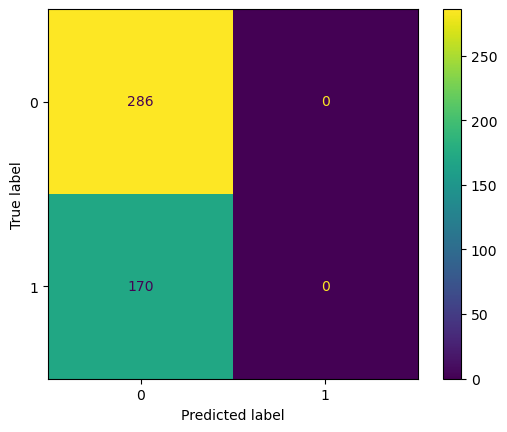

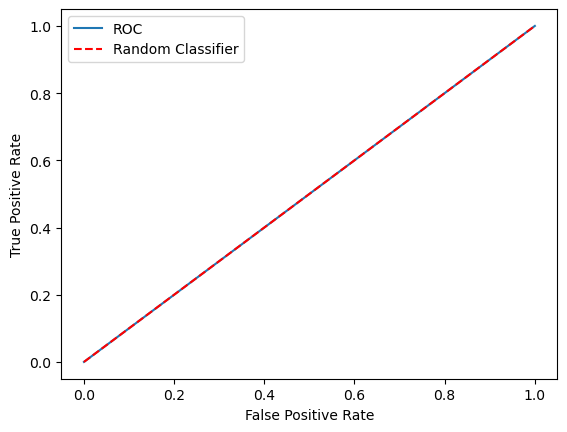


Testing Set


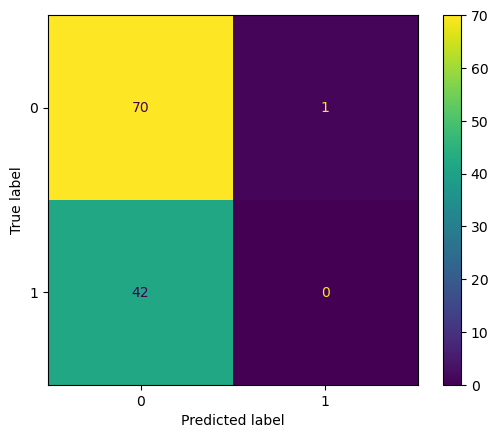

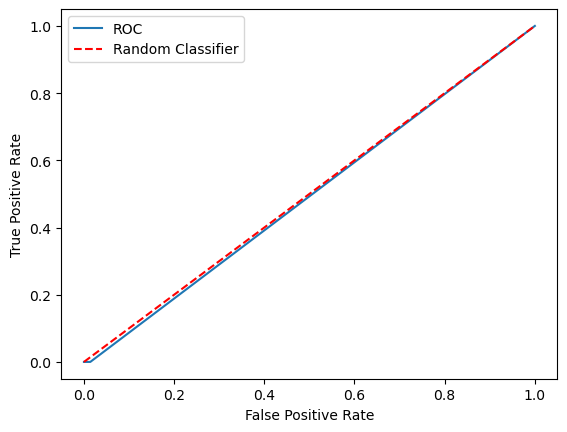



For all 30 iterations: 

Average Train Accuracy:  0.6271929824561403
Average Train Precision:  0.0
Average Train Recall:  0.0
Average Train F1-Score:  0.0
Average Train AUC Score:  0.5

Average Test Accuracy:  0.620353982300885
Average Test Precision:  0.43761261261261264
Average Test Recall:  0.0595238095238095
Average Test F1-Score:  0.06693037094337506
Average Test AUC Score:  0.5058182427900738


In [9]:
biiiavgaccuracytrain = [];
biiiavgprecisiontrain = [];
biiiavgrecalltrain = [];
biiiavgf1train = [];
biiiavgauctrain = [];
biiiavgaccuracytest = [];
biiiavgprecisiontest = [];
biiiavgrecalltest = [];
biiiavgf1test = [];
biiiavgauctest = [];

for i in range(1,31):

    df['Diagnosis'] = df['Diagnosis'].replace(['B'], 0)
    df['Diagnosis'] = df['Diagnosis'].replace(['M'], 1)

    dfM = df.loc[df['Diagnosis'] == 1]
    dfB = df.loc[df['Diagnosis'] == 0]

    dfM20 = dfM.sample(frac=0.2)
    dfM80 = dfM.drop(dfM20.index) 
    dfB20 = dfB.sample(frac=0.2)
    dfB80 = dfB.drop(dfB20.index)

    dfMtestYs = dfM20[['Diagnosis']]
    dfMtestXs = dfM20.drop(dfM20[['Diagnosis']], axis=1)
    dfMtrainYs = dfM80[['Diagnosis']]
    dfMtrainXs = dfM80.drop(dfM80[['Diagnosis']], axis=1)

    dfBtestYs = dfB20[['Diagnosis']]
    dfBtestXs = dfB20.drop(dfB20[['Diagnosis']], axis=1)
    dfBtrainYs = dfB80[['Diagnosis']]
    dfBtrainXs = dfB80.drop(dfB80[['Diagnosis']], axis=1)

    #append two dataframes and get the test and train sets
    trainXs = dfMtrainXs.append(dfBtrainXs)
    trainYs = dfMtrainYs.append(dfBtrainYs)

    testXs = dfMtestXs.append(dfBtestXs)
    testYs = dfMtestYs.append(dfBtestYs)

    km = KMeans(n_clusters=2)
    km.fit(trainXs)

    # --------------- PART B ---------------
    dist = [];
    majpoll = [];
    for element in km.cluster_centers_:
        for index,row in trainXs.iterrows():
            dist.append((euclidean_distances([element], [row]), index))
    
        dist.sort(reverse=True)
        maj = [];
        for a in range(30):
            hi = int(trainYs.loc[[dist[a][1]]]['Diagnosis'])
            maj.append(hi)
        
        for b in range(228):
            majpoll.append(mode(maj))

    # ----------------- Training Set ----------------
    # Accuracy
    actrain = accuracy_score(trainYs, majpoll)
    print("Accuracy Score Train: ", actrain)
    # Precision
    pscoretrain = metrics.precision_score(trainYs, majpoll) #km.labels_, majpoll)
    print("Precision Score Train: ", pscoretrain)
    # Recall
    truepositivetrain = metrics.recall_score(trainYs, majpoll) #km.labels_, majpoll)
    print("True Positive Rate Train: ", truepositivetrain)
    # F-1 Score
    f1Scoretrain = metrics.f1_score(trainYs, majpoll) #km.labels_, majpoll)
    print("F-1 Score Train: ", f1Scoretrain) 
    #AUC Score
    auctrain = roc_auc_score(trainYs, majpoll) #km.labels_, majpoll)
    print("AUC Score Train:", auctrain)
    
    # ---------------------- PART C ------------------------
    predYstest = km.predict(testXs)

    # ----------------- Testing Set ----------------
    print("")
    # Accuracy
    actest = accuracy_score(testYs, predYstest)
    print("Accuracy Score Test: ", actest)
    # Precision
    pscoretest = metrics.precision_score(testYs, predYstest)
    print("Precision Score Test: ", pscoretest)
    # Recall
    truepositivetest = metrics.recall_score(testYs, predYstest)
    print("True Positive Rate Test: ", truepositivetest)
    # F-1 Score
    f1Scoretest = metrics.f1_score(testYs, predYstest)
    print("F-1 Score Test: ", f1Scoretest) 
    #AUC Score
    auctest = roc_auc_score(testYs, predYstest)
    print("AUC Score Test:", auctest)
    print("")
    # --------------- Print for one of the iterations -------------------
    if i == 30:
        # ------------------ Training Set ----------------------
        print("")
        print("Training Set")
        # Confusion Matrix
        cmatrix = metrics.confusion_matrix(trainYs, majpoll) #km.labels_, majpoll)
        cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
        cmatrixdisp.plot()
        plt.grid(False)
        plt.show()

        #ROC Curve
        fp, tp, _ = roc_curve(trainYs, majpoll)# km.labels_, majpoll)
        roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
        plt.legend()
        plt.show(roc_display)

        # ------------------ Testing Set ----------------------
        print("")
        print("Testing Set")
        # Confusion Matrix
        cmatrix = metrics.confusion_matrix(testYs, predYstest)
        cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
        cmatrixdisp.plot()
        plt.grid(False)
        plt.show()

        #ROC Curve
        fp, tp, _ = roc_curve(testYs, predYstest)
        roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
        plt.legend()
        plt.show(roc_display)
    
    biiiavgaccuracytrain.append(actrain);
    biiiavgprecisiontrain.append(pscoretrain);
    biiiavgrecalltrain.append(truepositivetrain);
    biiiavgf1train.append(f1Scoretrain);
    biiiavgauctrain.append(auctrain);

    biiiavgaccuracytest.append(actest);
    biiiavgprecisiontest.append(pscoretest);
    biiiavgrecalltest.append(truepositivetest);
    biiiavgf1test.append(f1Scoretest);
    biiiavgauctest.append(auctest);

print("")
print("")
print("For all 30 iterations: ")
print("")
print("Average Train Accuracy: ", sum(biiiavgaccuracytrain)/len(biiiavgaccuracytrain))
print("Average Train Precision: ", sum(biiiavgprecisiontrain)/len(biiiavgprecisiontrain))
print("Average Train Recall: ", sum(biiiavgrecalltrain)/len(biiiavgrecalltrain))
print("Average Train F1-Score: ", sum(biiiavgf1train)/len(biiiavgf1train))
print("Average Train AUC Score: ", sum(biiiavgauctrain)/len(biiiavgauctrain))
print("")
print("Average Test Accuracy: ", sum(biiiavgaccuracytest)/len(biiiavgaccuracytest))
print("Average Test Precision: ", sum(biiiavgprecisiontest)/len(biiiavgprecisiontest))
print("Average Test Recall: ", sum(biiiavgrecalltest)/len(biiiavgrecalltest))
print("Average Test F1-Score: ", sum(biiiavgf1test)/len(biiiavgf1test))
print("Average Test AUC Score: ", sum(biiiavgauctest)/len(biiiavgauctest))
    

### 1b(iv).

### A.
By not assigning a random_state in the spectral clustering algorithm, we are avoiding local minimum because we are randomly assigning the initial conditions every time we run rather than using the same initial conditions.

### 1(biv)B and C.

Accuracy Score Train:  0.6228070175438597
Precision Score Train:  0.0
True Positive Rate Train:  0.0
F-1 Score Train:  0.0
AUC Score Train: 0.4965034965034965

Accuracy Score Test:  0.6194690265486725
Precision Score Test:  0.0
True Positive Rate Test:  0.0
F-1 Score Test:  0.0
AUC Score Test: 0.49295774647887325

Accuracy Score Train:  0.6228070175438597
Precision Score Train:  0.0
True Positive Rate Train:  0.0
F-1 Score Train:  0.0
AUC Score Train: 0.4965034965034965

Accuracy Score Test:  0.6283185840707964
Precision Score Test:  0.0
True Positive Rate Test:  0.0
F-1 Score Test:  0.0
AUC Score Test: 0.5

Accuracy Score Train:  0.6228070175438597
Precision Score Train:  0.0
True Positive Rate Train:  0.0
F-1 Score Train:  0.0
AUC Score Train: 0.4965034965034965

Accuracy Score Test:  0.6283185840707964
Precision Score Test:  0.0
True Positive Rate Test:  0.0
F-1 Score Test:  0.0
AUC Score Test: 0.5

Accuracy Score Train:  0.6228070175438597
Precision Score Train:  0.0
True Positive 

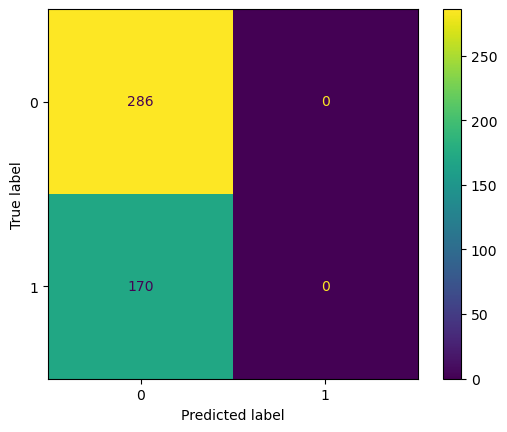

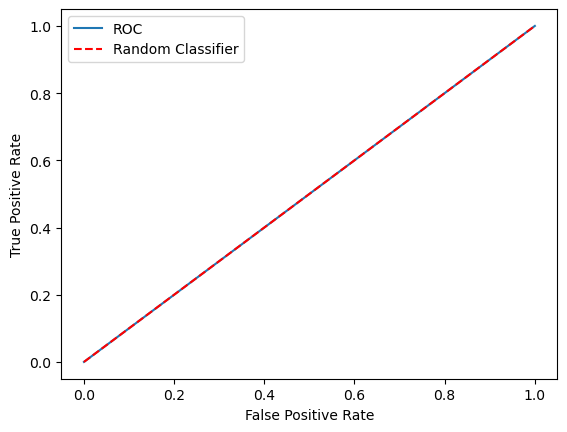


Testing Set


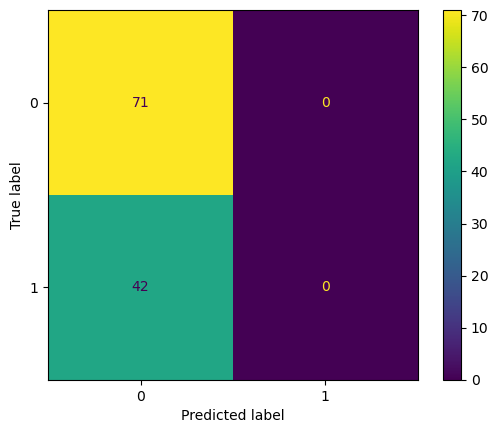

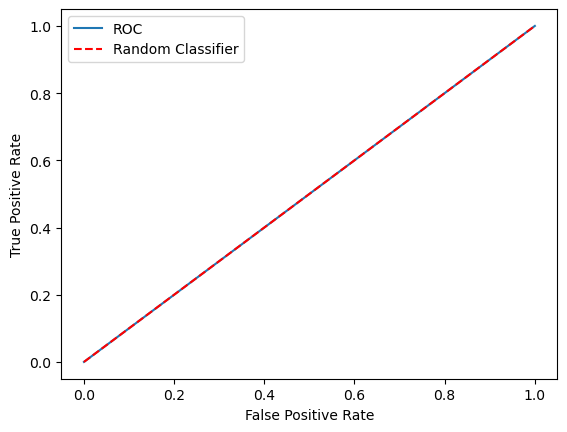



For all 30 iterations: 

Average Train Accuracy:  0.6228070175438597
Average Train Precision:  0.0
Average Train Recall:  0.0
Average Train F1-Score:  0.0
Average Train AUC Score:  0.4965034965034966

Average Test Accuracy:  0.6241887905604723
Average Test Precision:  0.0
Average Test Recall:  0.0
Average Test F1-Score:  0.0
Average Test AUC Score:  0.4967136150234743


In [25]:
bivavgaccuracytrain = [];
bivavgprecisiontrain = [];
bivavgrecalltrain = [];
bivavgf1train = [];
bivavgauctrain = [];
bivavgaccuracytest = [];
bivavgprecisiontest = [];
bivavgrecalltest = [];
bivavgf1test = [];
bivavgauctest = [];
cluster = pd.DataFrame()
cluster["index"] = trainYs.index.values

for i in range(1,31):

    df['Diagnosis'] = df['Diagnosis'].replace(['B'], 0)
    df['Diagnosis'] = df['Diagnosis'].replace(['M'], 1)

    dfM = df.loc[df['Diagnosis'] == 1]
    dfB = df.loc[df['Diagnosis'] == 0]

    dfM20 = dfM.sample(frac=0.2)
    dfM80 = dfM.drop(dfM20.index) 
    dfB20 = dfB.sample(frac=0.2)
    dfB80 = dfB.drop(dfB20.index)

    dfMtestYs = dfM20[['Diagnosis']]
    dfMtestXs = dfM20.drop(dfM20[['Diagnosis']], axis=1)
    dfMtrainYs = dfM80[['Diagnosis']]
    dfMtrainXs = dfM80.drop(dfM80[['Diagnosis']], axis=1)

    dfBtestYs = dfB20[['Diagnosis']]
    dfBtestXs = dfB20.drop(dfB20[['Diagnosis']], axis=1)
    dfBtrainYs = dfB80[['Diagnosis']]
    dfBtrainXs = dfB80.drop(dfB80[['Diagnosis']], axis=1)

    #append two dataframes and get the test and train sets
    trainXs = dfMtrainXs.append(dfBtrainXs)
    trainYs = dfMtrainYs.append(dfBtrainYs)

    testXs = dfMtestXs.append(dfBtestXs)
    testYs = dfMtestYs.append(dfBtestYs)

    # ----------- PART B -------------
    sc = SpectralClustering(n_clusters=2)
    spec = sc.fit_predict(trainXs)

    km = KNeighborsClassifier(n_neighbors=1)
    km.fit(trainXs, spec)

    # ----------------- Training Set ----------------
     # Accuracy
    actrain = accuracy_score(trainYs, spec)
    print("Accuracy Score Train: ", actrain)
    # Precision
    pscoretrain = metrics.precision_score(trainYs, spec)
    print("Precision Score Train: ", pscoretrain)
    # Recall
    truepositivetrain = metrics.recall_score(trainYs, spec)
    print("True Positive Rate Train: ", truepositivetrain)
    # F-1 Score
    f1Scoretrain = metrics.f1_score(trainYs, spec)
    print("F-1 Score Train: ", f1Scoretrain) 
    #AUC Score
    auctrain = roc_auc_score(trainYs, spec)
    print("AUC Score Train:", auctrain)
    
    # ---------------------- PART C ------------------------
    predYstest = km.predict(testXs)

    # ----------------- Testing Set ----------------
    print("")
    # Accuracy
    actest = accuracy_score(testYs, predYstest)
    print("Accuracy Score Test: ", actest)
    # Precision
    pscoretest = metrics.precision_score(testYs, predYstest)
    print("Precision Score Test: ", pscoretest)
    # Recall
    truepositivetest = metrics.recall_score(testYs, predYstest)
    print("True Positive Rate Test: ", truepositivetest)
    # F-1 Score
    f1Scoretest = metrics.f1_score(testYs, predYstest)
    print("F-1 Score Test: ", f1Scoretest) 
    #AUC Score
    auctest = roc_auc_score(testYs, predYstest)
    print("AUC Score Test:", auctest)
    print("")
    # --------------- Print for one of the iterations -------------------
    if i == 30:
        # ------------------ Training Set ----------------------
        print("")
        print("Training Set")
        # Confusion Matrix
        cmatrix = metrics.confusion_matrix(trainYs, majpoll)
        cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
        cmatrixdisp.plot()
        plt.grid(False)
        plt.show()

        #ROC Curve
        fp, tp, _ = roc_curve(trainYs, majpoll)
        roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
        plt.legend()
        plt.show(roc_display)

        # ------------------ Testing Set ----------------------
        print("")
        print("Testing Set")
        # Confusion Matrix
        cmatrix = metrics.confusion_matrix(testYs, predYstest)
        cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
        cmatrixdisp.plot()
        plt.grid(False)
        plt.show()

        #ROC Curve
        fp, tp, _ = roc_curve(testYs, predYstest)
        roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
        plt.legend()
        plt.show(roc_display)
    
    bivavgaccuracytrain.append(actrain);
    bivavgprecisiontrain.append(pscoretrain);
    bivavgrecalltrain.append(truepositivetrain);
    bivavgf1train.append(f1Scoretrain);
    bivavgauctrain.append(auctrain);

    bivavgaccuracytest.append(actest);
    bivavgprecisiontest.append(pscoretest);
    bivavgrecalltest.append(truepositivetest);
    bivavgf1test.append(f1Scoretest);
    bivavgauctest.append(auctest);

print("")
print("")
print("For all 30 iterations: ")
print("")
print("Average Train Accuracy: ", sum(bivavgaccuracytrain)/len(bivavgaccuracytrain))
print("Average Train Precision: ", sum(bivavgprecisiontrain)/len(bivavgprecisiontrain))
print("Average Train Recall: ", sum(bivavgrecalltrain)/len(bivavgrecalltrain))
print("Average Train F1-Score: ", sum(bivavgf1train)/len(bivavgf1train))
print("Average Train AUC Score: ", sum(bivavgauctrain)/len(bivavgauctrain))
print("")
print("Average Test Accuracy: ", sum(bivavgaccuracytest)/len(bivavgaccuracytest))
print("Average Test Precision: ", sum(bivavgprecisiontest)/len(bivavgprecisiontest))
print("Average Test Recall: ", sum(bivavgrecalltest)/len(bivavgrecalltest))
print("Average Test F1-Score: ", sum(bivavgf1test)/len(bivavgf1test))
print("Average Test AUC Score: ", sum(bivavgauctest)/len(bivavgauctest))

### 1b(v).

The test scores for bi L1-SVM are generally lower, but close, except for precision where the test precision is much lower than the training. The test scores for bii L1-SVM with the labeled and unlabeled data situation are mixed where the test precision, F1, and AUC score are much much lower than the train, but recall is higher with a perfect 1.0. The test scores for bii L1-SVM with the labeled and unlabeled data situation are mixed where the test precision, F1, and AUC score are much much lower than the train, but recall is higher with a perfect 1.0. The test scores for biii kmeans are much higher than the training scores on average. The test scores for biv spectral clustering are much higher than the training scores on average. The kmeans and spectral clustering scores are much much lower than the L1 penalized SVM scores. The highest test scores were for the L1 penalized SVM without separating the labeled and unlabeled data. The unsupervised methods did heavily underperform. 

### 2(a).

In [12]:
#data preprocessing
names = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
bankcomp = pd.read_csv('../data/data_banknote_authentication.txt', names=names)

banktrain = bankcomp.sample(n=900) 
banktest = bankcomp.drop(banktrain.index)

banktrainYs = banktrain['Class']
banktrainXs = banktrain.drop(banktrain[['Class']], axis=1)

banktestYs = banktest['Class']
banktestXs = banktest.drop(banktest[['Class']], axis=1)


### 2(bi).

In [13]:
bi50errors = [];
bij = [];

for j in range(10,910,10): 
    bij.append(j)
    errors = [];
    for i in range(1,51):
        dftemp = banktrain.sample(n=j)
        counts = dftemp['Class'].value_counts()

        for count in counts:
            if count == 0 or count == 10:
                dftemp = banktrain.sample(n=j+10)

        dftempYs = dftemp[['Class']]        
        dftempXs = dftemp.drop(dftemp[['Class']], axis=1)

        parameters = {'C':[0.001,0.01,0.1,1]}
        model = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), parameters, cv=5)
        linsvm = model.fit(dftempXs, dftempYs)
    
        predYs = linsvm.predict(banktestXs)
        error = 1-accuracy_score(banktestYs, predYs)
        errors.append(error)
        
    bi50errors.append(errors)

### 2b(ii).

In [14]:
bii50errors = [];
biij = [];

for j in range(10, 910, 10): 
    biij.append(j)
    errors = [];
    dftempXs = pd.DataFrame()
    for i in range(1,51):
        dftemp = banktrain.sample(n=j)
        counts = dftemp['Class'].value_counts()

        for count in counts:
            if count == 0 or count == 10:
                dftemp = banktrain.sample(n=j+10)

        dftempYs = dftemp[['Class']]        
        dftempXs = dftemp.drop(dftemp[['Class']], axis=1)
        
        parameters = {'C':[0.001,0.01,0.1,1]}
        model3 = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), parameters, cv=5)
        lin = model3.fit(dftempXs, dftempYs)
    
        distances = [];
        for index,row in banktrainXs.iterrows():
            decision = lin.decision_function([row])
            norm = np.linalg.norm(svmmodel.best_estimator_.coef_)
            dist = decision/norm
            distances.append((dist, row, index))
        
        distances.sort(key=lambda x: x[0], reverse=True)
    
        for i in range(10):
            dftempXs.append(distances[i][1])
            dftempYs.append(banktrainYs.loc[[distances[i][2]]])
            lin = model3.fit(dftempXs, dftempYs)

        predYs = lin.predict(banktestXs)
        error = 1-accuracy_score(banktestYs, predYs)
        errors.append(error)
        
    bii50errors.append(errors)

### 2(c).

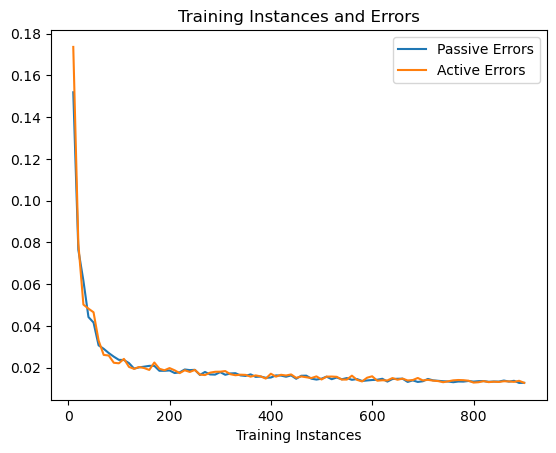

In [15]:
bilist= [];
biilist = [];

for element in bi50errors:
    avg = sum(element)/50
    bilist.append(avg)

for element in bii50errors:
    avg = sum(element)/50
    biilist.append(avg)

# Creating dataframe containing training instances, passive errors, and active errors
plotdf = pd.DataFrame(zip(bij, bilist, biilist), columns =['Training Instances', 'Passive Errors', 'Active Errors'])

# Plotting passive and active errors
plotdf.plot(x="Training Instances", y=["Passive Errors", "Active Errors"], title="Training Instances and Errors")
plt.show()

### References

https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://datatofish.com/replace-values-pandas-dataframe/

https://www.freecodecamp.org/news/python-sort-how-to-sort-a-list-in-python/#:~:text=Descending%20(or%20decreasing)%20order%20is,set%20its%20value%20to%20True%20.

https://stackoverflow.com/questions/31674557/how-to-append-rows-in-a-pandas-dataframe-in-a-for-loop

https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

https://www.statology.org/pandas-select-rows-by-index/

https://stackoverflow.com/questions/32074239/sklearn-getting-distance-of-each-point-from-decision-boundary

https://www.positioniseverything.net/expected-2d-array-got-1d-array-instead/#:~:text=Instead%20Error%20Happens%3F-,Valueerror%3A%20expected%202D%20array%2C%20got%201D%20array%20instead%20error%20happens,requires%20a%202D%20array%20instead.

https://stackoverflow.com/questions/24375911/how-to-print-estimated-coefficients-after-a-gridsearchcv-fit-a-model-sgdregr